# OCR

문자 인식은 **Detection** + **Recognition**을 통해 가능하다.

이때 문자 영역은 아래와 같이 다양하게 설정가능하다.

![image](https://user-images.githubusercontent.com/86637320/133185985-34cbc5f6-a4a6-4b85-bcc1-0f36c33b8f2e.png)

## 1. 초기 시도

#### LeNet

간단한 문자 인식만 가능하다!

![image](https://user-images.githubusercontent.com/86637320/133186663-25ff6fc7-9142-4d0b-b701-52e82c33f069.png)

![LeNet](https://user-images.githubusercontent.com/86637320/133186740-66661136-d284-4e75-b4ed-835861358075.gif)

## 2. 딥러닝을 통한 시도

#### (1) Detection 

object detection 방법으로 접근. 모델에게 문자를 찾아내도록 학습

어떤 단위로 검측? 문자, 단어, 줄

![image](https://user-images.githubusercontent.com/86637320/133188363-6467e3be-9726-4259-b8b1-a2d194ed68e5.png)

#### (2) Recognition 

자연어 처리 개념을 활용하기 위해서 **RNN + CNN**인 CRNN 모델 사용 => 우리가 궁금한 것도 문자기 때문에

CNN 통해서 텍스트 관련 이미지 특징 추출 후 문자처럼 RNN 입력으로 활용

![image](https://user-images.githubusercontent.com/86637320/133188600-0f53b326-5576-4d30-9e15-9f6253054ad9.png)

단순 문자 인식 말고 의미를 가진 문단(paragraph)는 어떻게 파악?

ex) 이미지 내 단어 영역의 위치 정보를 기준으로 문단 분리. L2 distance를 통해 일정 거리 이내 단어들을 문단으로 인식

___

In [118]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2 
import matplotlib.image as img

## 3. Google OCR API

In [145]:
file_dir = os.getenv("HOME")+ '/aiffel/ocr_python/test/google_api'
file_list = os.listdir(file_dir)

file_list = [os.path.join(file_dir,file_list[i]) for i in range(len(file_list))]
file_list.sort()
file_list

['/aiffel/aiffel/ocr_python/test/google_api/0.png',
 '/aiffel/aiffel/ocr_python/test/google_api/1.png',
 '/aiffel/aiffel/ocr_python/test/google_api/2.png',
 '/aiffel/aiffel/ocr_python/test/google_api/3.png',
 '/aiffel/aiffel/ocr_python/test/google_api/4.png',
 '/aiffel/aiffel/ocr_python/test/google_api/5.png',
 '/aiffel/aiffel/ocr_python/test/google_api/6.png',
 '/aiffel/aiffel/ocr_python/test/google_api/7.png',
 '/aiffel/aiffel/ocr_python/test/google_api/8.png',
 '/aiffel/aiffel/ocr_python/test/google_api/9.png']

In [146]:
len(file_list)

10

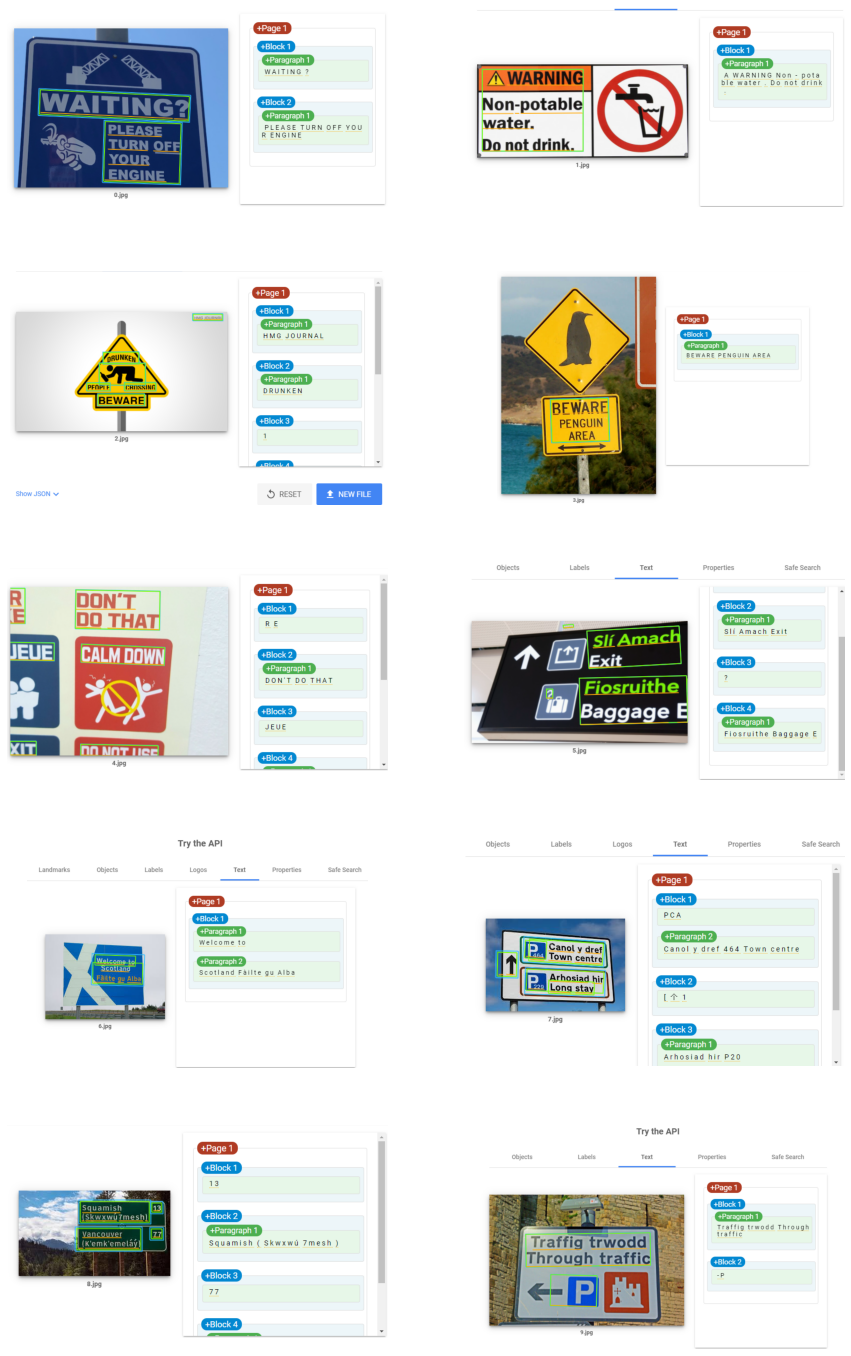

In [147]:
fig, axes =plt.subplots(5,2,figsize=(15,25)) 

for i,ax in enumerate(axes.flatten()):
    image = Image.open(file_list[i])
    ax.imshow(image)
    ax.axis('off')

plt.show()

#### 모든 문자들이 잘 인식 됐다.

## 3. Keras_OCR 써보기

In [151]:
file_dir = os.getenv("HOME")+ '/aiffel/ocr_python/test/img'
file_list = os.listdir(file_dir)

file_list = [os.path.join(file_dir,file_list[i]) for i in range(len(file_list))]
file_list.sort()
file_list

['/aiffel/aiffel/ocr_python/test/img/0.jpg',
 '/aiffel/aiffel/ocr_python/test/img/1.jpg',
 '/aiffel/aiffel/ocr_python/test/img/2.jpg',
 '/aiffel/aiffel/ocr_python/test/img/3.jpg',
 '/aiffel/aiffel/ocr_python/test/img/4.jpg',
 '/aiffel/aiffel/ocr_python/test/img/5.jpg',
 '/aiffel/aiffel/ocr_python/test/img/6.jpg',
 '/aiffel/aiffel/ocr_python/test/img/7.jpg',
 '/aiffel/aiffel/ocr_python/test/img/8.jpg',
 '/aiffel/aiffel/ocr_python/test/img/9.jpg']

기존에 구축된 [pipeline](https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/pipeline.py) 통해서 detector, recognizer 모델을 자동으로 다운로드

In [152]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


이미지 불러와서 인식해보기

In [153]:
# 테스트에 사용할 이미지들을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
images = [ keras_ocr.tools.read(file) for file in file_list]
prediction_groups = [pipeline.recognize([file]) for file in file_list]

인식 결과 출력

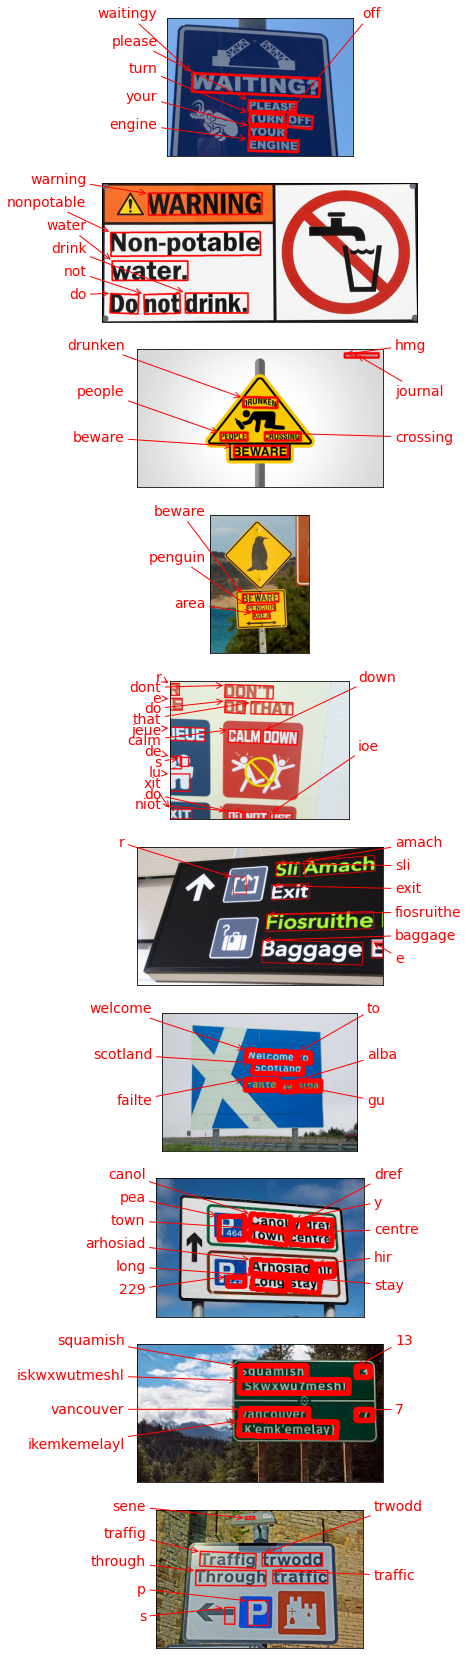

In [154]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

#### 모든 문자들이 잘 인식 됐다.

## 4. 테서렉트 사용해보기

테서렉트를 바로 사용하기 보다는 **wrapper library**인 **Pytesseract**을 활용하자.

wrapping의 필요성? 의존성을 낮추기 위해서. 라이브러리 변경에도 대처하기 쉽다.

In [185]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def ocr(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3' #oem, psm mode selection
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
            
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗")        

0.jpg


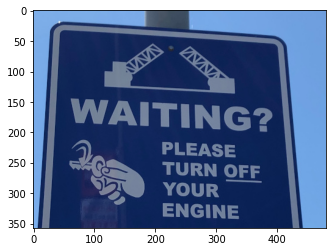

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
WAITING?

ee]

ENGINE

❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
1.jpg


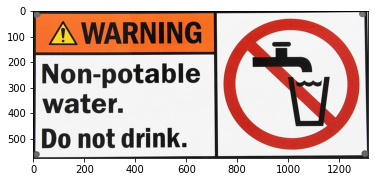

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/\ WARNING

a

Non-potabie

fey

N

water.

Do

not

arink.

; aa

❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
2.jpg


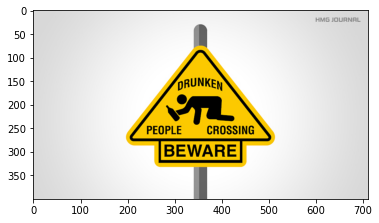

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
MG JO

iivi=ii

fe

❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
3.jpg


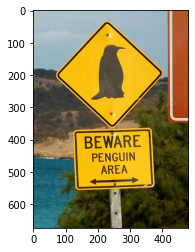

/aiffel/aiffel/ocr_python/test/0000.png
ms

❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
4.jpg


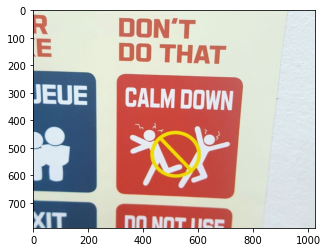

/aiffel/aiffel/ocr_python/test/0000.png

❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
5.jpg


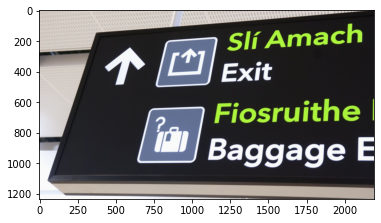

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/aiffel/aiffel/ocr_python/test/0010.png
/aiffel/aiffel/ocr_python/test/0011.png
Sy

Sli Amach

4

Exit

ry

Fiosr

Sikhs

aie


Baggage

f=

|

❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
6.jpg


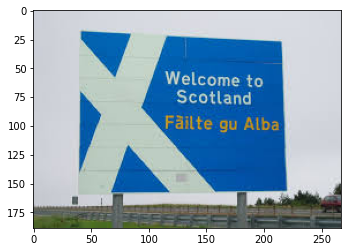

/aiffel/aiffel/ocr_python/test/0000.png
| a

❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
7.jpg


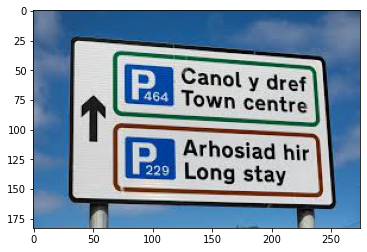

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/aiffel/aiffel/ocr_python/test/0010.png
/aiffel/aiffel/ocr_python/test/0011.png
/aiffel/aiffel/ocr_python/test/0012.png
/aiffel/aiffel/ocr_python/test/0013.png
/aiffel/aiffel/ocr_python/test/0014.png
/aiffel/aiffel/ocr_python/test/0015.png
/aiffel/aiffel/ocr_python/test/0016.png
/aiffel/aiffel/ocr_python/test/0017.png
/aiffel/aiffel/ocr_python/test/0018.png
/aiffel/aiffel/ocr_python/test/0019.png
/aiffel/aiffel/ocr_python/test/0020.png

y

I I

™}


1)


Cano

Ly

dref

Tt

:

OW

1) centre

'

Arhosiad

nir

Bree

Long

stay


❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
8

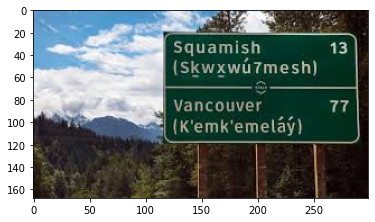

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
/aiffel/aiffel/ocr_python/test/0008.png
/aiffel/aiffel/ocr_python/test/0009.png
/aiffel/aiffel/ocr_python/test/0010.png
/aiffel/aiffel/ocr_python/test/0011.png
/aiffel/aiffel/ocr_python/test/0012.png
/aiffel/aiffel/ocr_python/test/0013.png
/aiffel/aiffel/ocr_python/test/0014.png
/aiffel/aiffel/ocr_python/test/0015.png
/aiffel/aiffel/ocr_python/test/0016.png

y

al


a )

=n}

Pa

Squam

ish

BLA ea rau

13

Vancouv

aag

ai

issue



❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗
9.jpg


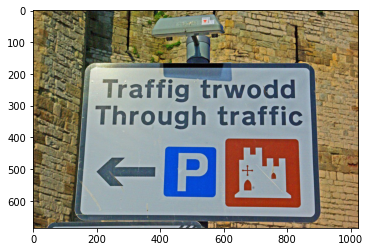

/aiffel/aiffel/ocr_python/test/0000.png
/aiffel/aiffel/ocr_python/test/0001.png
/aiffel/aiffel/ocr_python/test/0002.png
/aiffel/aiffel/ocr_python/test/0003.png
/aiffel/aiffel/ocr_python/test/0004.png
/aiffel/aiffel/ocr_python/test/0005.png
/aiffel/aiffel/ocr_python/test/0006.png
/aiffel/aiffel/ocr_python/test/0007.png
=


oie ae

rraffig

True

Tnroug

nN trattic


❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗Done❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗❗


In [186]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test'

for file in file_list:
    file_name = file.split('img')[-1]
    print(file_name[1:])
    img = Image.open(file)
    plt.imshow(img)
    plt.show()
    ocr(file,work_dir)

#### 3,4,6 이미지의 경우 문자를 거의 찾지도 못했고 문자를 어느 정도 찾은 이미지에선 인식 결과를 그대로 사용하기에는 온전한 단어가 완성되지 않았기 때문에 무리가 있어보인다.

___

표지판 OCR 서비스
- 서비스 목적   
표지판에서 중요한 문자 정보를 인식한다.    

- 모델 평가 기준   
실제 설치된 표지판에서도 정보를 인식할 수 있는지.   
알파벳으로 이뤄진 다른 언어도 인식할 수 있는지.   

#### Google OCR : 성능이 매우 좋다. 문자 뿐만이 아니고 다양한 정보들도(색상, 객체 종류, Safe Search 여부) 얻을 수 있다. 역시 유료라서 좋다. 

#### Keras OCR : 성능이 매우 좋다. 육안으로 잘 안보이는 숨은 글씨까지 잘 찾았다. 이 정도만 돼도 충분히 활용할 수 있다!

#### 테서렉트 : 성능이 매우 안 좋다. 애초에 문자 인식도 잘 안 되고 찾은 문자에 대해서도 한 두 글자를 빼먹는 등 하자가 있어 실제 사용하기엔 무리가 있다.

___

# 정리

OCR 기능을 이용해봤다.

유료 API와 무료 API 두 종류를 이용해봤는데 무료 API 중 테서렉트의 경우 기본 설정만 가지고 **표지판 인식 OCR**에 사용하기에는 무리가 있어보인다. 하지만 목적에 맞게 설정을 바꾸거나 한다면 테서렉트도도 충분히 좋은 성능을 낼 것으로 기대된다.